In [15]:
import numpy as np
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split


dataset = pd.read_csv('/Users/eddie/OneDrive/Documents/Injury Dataset/2013-2022/2018-2022 Data Cleaned Trainable.csv')

X = pd.DataFrame(dataset.iloc[:,:22].values)
Y = pd.DataFrame(dataset.iloc[:,22:].values)
print(X)
print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# X_train = X_train.reshape(35276,22,1)
# X_test = X_test.reshape(8819,22,1)

print(X_train.shape)
print(Y_train.shape)

       0   1   2   3   4   5   6   7   8   9   ...  12  13  14   15  16  17  \
0       1   1   1   1   0   1   3  55   1   1  ...   0   0   1    0   0   1   
1       1   1   1   1   0   1   0  16   1   1  ...   0   0   1    0   0   1   
2       1   1   1   1   3   0   3  41   1   1  ...   0   1   1    0   1   1   
3       1   1   2   2   3   0   0  21   2   1  ...   0   0   1    0   0   1   
4       1   1   2   1   3   0   1  66   1   1  ...   0   0   1  174   0   1   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ...  ..  ..   
44090   2   4   1   2   0   1   0  53   1   1  ...   1   0   1    0   0   1   
44091   2   4   1   2   0   1   2  27   1   1  ...   1   0   1    0   1   1   
44092   2   4   1   2   1   0   1  25   1   1  ...   1   1   1  155   0   1   
44093   2   4   1   2   1   0   1  21   2   1  ...   1   1   1  120   0   0   
44094   2   4   1   1   0   1   1  43   1   1  ...   0   1   1   70   1   1   

       18  19  20  21  
0       2   2   3   1  
1  

In [16]:
features = pd.DataFrame(dataset.iloc[:,:32])
features = features.columns
print(features)

Index(['STATE', 'SEASON', 'DAY', 'HOUR', 'HARM_EV', 'MAN_COLL', 'BODY_TYP',
       'AGE', 'GENDER', 'PER_TYP', 'SEAT_POS', 'REST_USE', 'AIR_BAG',
       'DRINKING', 'ATST_TYP', 'ALC_RES', 'DRUGS', 'DSTATUS', 'ETHNICITY ',
       'RUR_URB', 'FUNC_SYS', 'IMPACT1', 'INJ_SEV'],
      dtype='object')


In [17]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras import layers

In [18]:
model = Sequential()

# First convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(22,1)))

# Max pooling layer
model.add(MaxPooling1D(pool_size=2))

# Second convolutional layer
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))

# Second max pooling layer
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
# Flatten the output to feed it into the Dense layer
model.add(Flatten())

# Dense layer with dropout for regularization
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer (binary classification)
model.add(Dense(3, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train,Y_train,epochs = 200,batch_size=128)


Epoch 1/200
276/276 [==============================] - 3s 7ms/step - loss: 0.6559 - accuracy: 0.7328
Epoch 2/200
276/276 [==============================] - 2s 6ms/step - loss: 0.2537 - accuracy: 0.9029
Epoch 3/200
276/276 [==============================] - 1s 5ms/step - loss: 0.2113 - accuracy: 0.9135
Epoch 4/200
276/276 [==============================] - 1s 5ms/step - loss: 0.2019 - accuracy: 0.9146
Epoch 5/200
276/276 [==============================] - 1s 5ms/step - loss: 0.1969 - accuracy: 0.9156
Epoch 6/200
276/276 [==============================] - 1s 5ms/step - loss: 0.1934 - accuracy: 0.9160
Epoch 7/200
276/276 [==============================] - 1s 5ms/step - loss: 0.1916 - accuracy: 0.9172
Epoch 8/200
276/276 [==============================] - 1s 5ms/step - loss: 0.1901 - accuracy: 0.9170
Epoch 9/200
276/276 [==============================] - 1s 5ms/step - loss: 0.1886 - accuracy: 0.9173
Epoch 10/200
276/276 [==============================] - 1s 5ms/step - loss: 0.1870 - accura

In [19]:
def find_max_index(arr):
    # print(arr)
    # print(max_value)
    return np.argmax(arr)

In [20]:
res = model.predict(X_test)
actual = []
for num in res:
    actual.append(np.argmax(num))
from sklearn.metrics import classification_report
print(classification_report(Y_test,actual,digits=6))

276/276 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0   0.775483  0.757319  0.766294      1537
           1   0.784393  0.801063  0.792640      1694
           2   1.000000  1.000000  1.000000      5588

    accuracy                       0.919492      8819
   macro avg   0.853292  0.852794  0.852978      8819
weighted avg   0.919456  0.919492  0.919438      8819



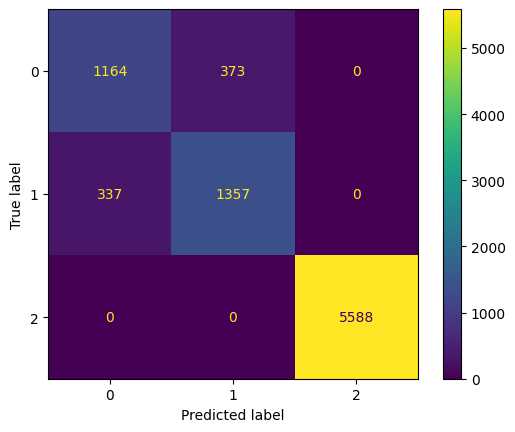

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusionmatrix = confusion_matrix(Y_test, actual)
cm_display = ConfusionMatrixDisplay(confusionmatrix, display_labels=[0,1,2])
cm_display.plot()

In [ ]:
import shap
from sklearn.naive_bayes import CategoricalNB

explainer = shap.KernelExplainer(model.predict, X_test[:400])
shap_values = explainer.shap_values(X_test[:400])
print(shap_values.shape)

13/13 [==============================] - 0s 4ms/step


Using 400 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
  0%|          | 0/400 [00:00<?, ?it/s]

26150/26150 [==============================] - 79s 3ms/step


  0%|          | 1/400 [01:45<11:40:10, 105.29s/it]

26150/26150 [==============================] - 87s 3ms/step


  0%|          | 2/400 [03:34<11:51:59, 107.33s/it]

26150/26150 [==============================] - 87s 3ms/step


  1%|          | 3/400 [05:22<11:53:17, 107.80s/it]

26150/26150 [==============================] - 88s 3ms/step


  1%|          | 4/400 [07:11<11:55:25, 108.40s/it]

26150/26150 [==============================] - 89s 3ms/step


  1%|▏         | 5/400 [09:01<11:57:53, 109.05s/it]

26150/26150 [==============================] - 89s 3ms/step


  2%|▏         | 6/400 [10:52<12:00:35, 109.74s/it]

26150/26150 [==============================] - 88s 3ms/step


  2%|▏         | 7/400 [12:43<12:00:43, 110.03s/it]

26150/26150 [==============================] - 76s 3ms/step


  2%|▏         | 8/400 [14:18<11:26:48, 105.12s/it]

26150/26150 [==============================] - 71s 3ms/step


  2%|▏         | 9/400 [15:47<10:52:15, 100.09s/it]

26150/26150 [==============================] - 75s 3ms/step


  2%|▎         | 10/400 [17:19<10:35:22, 97.75s/it]

26150/26150 [==============================] - 71s 3ms/step


  3%|▎         | 11/400 [18:49<10:16:48, 95.14s/it]

26150/26150 [==============================] - 71s 3ms/step


  3%|▎         | 12/400 [20:18<10:04:34, 93.49s/it]

26150/26150 [==============================] - 75s 3ms/step


  3%|▎         | 13/400 [21:51<10:00:46, 93.14s/it]

26150/26150 [==============================] - 72s 3ms/step


  4%|▎         | 14/400 [23:20<9:51:54, 92.01s/it] 

26150/26150 [==============================] - 72s 3ms/step


  4%|▍         | 15/400 [24:50<9:45:54, 91.31s/it]

26150/26150 [==============================] - 74s 3ms/step


  4%|▍         | 16/400 [26:23<9:47:39, 91.82s/it]

26150/26150 [==============================] - 72s 3ms/step


  4%|▍         | 17/400 [27:53<9:42:24, 91.24s/it]

26150/26150 [==============================] - 72s 3ms/step


  4%|▍         | 18/400 [29:22<9:37:38, 90.73s/it]

26150/26150 [==============================] - 75s 3ms/step


  5%|▍         | 19/400 [30:55<9:40:55, 91.48s/it]

26150/26150 [==============================] - 73s 3ms/step


  5%|▌         | 20/400 [32:26<9:37:17, 91.15s/it]

26150/26150 [==============================] - 74s 3ms/step


  5%|▌         | 21/400 [33:55<9:31:56, 90.55s/it]

26150/26150 [==============================] - 69s 3ms/step


  6%|▌         | 22/400 [35:20<9:19:34, 88.82s/it]

26150/26150 [==============================] - 62s 2ms/step


  6%|▌         | 23/400 [36:37<8:57:19, 85.51s/it]

26150/26150 [==============================] - 65s 2ms/step


  6%|▌         | 24/400 [37:57<8:44:58, 83.77s/it]

26150/26150 [==============================] - 61s 2ms/step


  6%|▋         | 25/400 [39:14<8:30:25, 81.67s/it]

26150/26150 [==============================] - 61s 2ms/step


  6%|▋         | 26/400 [40:31<8:20:40, 80.32s/it]

26150/26150 [==============================] - 64s 2ms/step


  7%|▋         | 27/400 [41:51<8:18:04, 80.12s/it]

26150/26150 [==============================] - 61s 2ms/step


  7%|▋         | 28/400 [43:07<8:09:56, 79.02s/it]

26150/26150 [==============================] - 62s 2ms/step


  7%|▋         | 29/400 [44:25<8:06:47, 78.73s/it]

26150/26150 [==============================] - 64s 2ms/step


  8%|▊         | 30/400 [45:51<8:19:00, 80.92s/it]

26150/26150 [==============================] - 60s 2ms/step


  8%|▊         | 31/400 [47:07<8:08:04, 79.36s/it]

26150/26150 [==============================] - 63s 2ms/step


  8%|▊         | 32/400 [48:25<8:04:55, 79.06s/it]

26150/26150 [==============================] - 66s 3ms/step


  8%|▊         | 33/400 [49:47<8:08:27, 79.86s/it]

26150/26150 [==============================] - 61s 2ms/step


  8%|▊         | 34/400 [51:03<7:59:30, 78.61s/it]

26150/26150 [==============================] - 65s 2ms/step


  9%|▉         | 35/400 [52:23<8:00:18, 78.95s/it]

26150/26150 [==============================] - 64s 2ms/step


  9%|▉         | 36/400 [53:42<8:00:32, 79.21s/it]

26150/26150 [==============================] - 62s 2ms/step


  9%|▉         | 37/400 [54:59<7:55:10, 78.54s/it]

26150/26150 [==============================] - 63s 2ms/step


 10%|▉         | 38/400 [56:18<7:54:00, 78.56s/it]

26150/26150 [==============================] - 61s 2ms/step


 10%|▉         | 39/400 [57:35<7:49:27, 78.03s/it]

26150/26150 [==============================] - 63s 2ms/step


 10%|█         | 40/400 [58:50<7:42:47, 77.13s/it]

26150/26150 [==============================] - 63s 2ms/step


 10%|█         | 41/400 [1:00:09<7:44:42, 77.67s/it]

26150/26150 [==============================] - 60s 2ms/step


 10%|█         | 42/400 [1:01:24<7:39:49, 77.07s/it]

26150/26150 [==============================] - 62s 2ms/step


 11%|█         | 43/400 [1:02:40<7:35:17, 76.52s/it]

26150/26150 [==============================] - 61s 2ms/step


 11%|█         | 44/400 [1:03:56<7:34:32, 76.61s/it]

26150/26150 [==============================] - 60s 2ms/step


 11%|█▏        | 45/400 [1:05:12<7:32:00, 76.40s/it]

26150/26150 [==============================] - 62s 2ms/step


 12%|█▏        | 46/400 [1:06:28<7:29:48, 76.24s/it]

26150/26150 [==============================] - 60s 2ms/step


 12%|█▏        | 47/400 [1:07:43<7:26:42, 75.93s/it]

26150/26150 [==============================] - 62s 2ms/step


 12%|█▏        | 48/400 [1:09:00<7:27:02, 76.20s/it]

26150/26150 [==============================] - 62s 2ms/step


 12%|█▏        | 49/400 [1:10:17<7:26:56, 76.40s/it]

26150/26150 [==============================] - 60s 2ms/step


 12%|█▎        | 50/400 [1:11:33<7:24:14, 76.16s/it]

26150/26150 [==============================] - 63s 2ms/step


 13%|█▎        | 51/400 [1:12:52<7:28:44, 77.15s/it]

26150/26150 [==============================] - 59s 2ms/step


 13%|█▎        | 52/400 [1:14:06<7:22:20, 76.27s/it]

26150/26150 [==============================] - 58s 2ms/step


 13%|█▎        | 53/400 [1:15:20<7:15:46, 75.35s/it]

26150/26150 [==============================] - 63s 2ms/step


 14%|█▎        | 54/400 [1:16:38<7:19:47, 76.26s/it]

26150/26150 [==============================] - 60s 2ms/step


 14%|█▍        | 55/400 [1:17:54<7:17:58, 76.17s/it]

26150/26150 [==============================] - 60s 2ms/step


 14%|█▍        | 56/400 [1:19:09<7:14:46, 75.83s/it]

26150/26150 [==============================] - 61s 2ms/step


 14%|█▍        | 57/400 [1:20:26<7:15:09, 76.12s/it]

26150/26150 [==============================] - 61s 2ms/step


 14%|█▍        | 58/400 [1:21:42<7:13:33, 76.06s/it]

26150/26150 [==============================] - 61s 2ms/step


 15%|█▍        | 59/400 [1:22:58<7:12:25, 76.09s/it]

26150/26150 [==============================] - 59s 2ms/step


 15%|█▌        | 60/400 [1:24:12<7:08:17, 75.58s/it]

26150/26150 [==============================] - 63s 2ms/step


 15%|█▌        | 61/400 [1:25:30<7:10:37, 76.22s/it]

26150/26150 [==============================] - 60s 2ms/step


 16%|█▌        | 62/400 [1:26:45<7:07:18, 75.85s/it]

26150/26150 [==============================] - 60s 2ms/step


 16%|█▌        | 63/400 [1:28:00<7:05:25, 75.74s/it]

26150/26150 [==============================] - 63s 2ms/step


 16%|█▌        | 64/400 [1:29:18<7:07:40, 76.37s/it]

26150/26150 [==============================] - 59s 2ms/step


 16%|█▋        | 65/400 [1:30:32<7:02:21, 75.64s/it]

26150/26150 [==============================] - 62s 2ms/step


 16%|█▋        | 66/400 [1:31:48<7:02:05, 75.83s/it]

26150/26150 [==============================] - 63s 2ms/step


 17%|█▋        | 67/400 [1:33:07<7:05:04, 76.59s/it]

26150/26150 [==============================] - 60s 2ms/step


 17%|█▋        | 68/400 [1:34:20<6:58:13, 75.58s/it]

26150/26150 [==============================] - 62s 2ms/step


 17%|█▋        | 69/400 [1:35:37<6:59:40, 76.07s/it]

26150/26150 [==============================] - 61s 2ms/step


 18%|█▊        | 70/400 [1:36:54<6:58:42, 76.13s/it]

26150/26150 [==============================] - 60s 2ms/step


 18%|█▊        | 71/400 [1:38:09<6:55:58, 75.86s/it]

26150/26150 [==============================] - 59s 2ms/step


 18%|█▊        | 72/400 [1:39:24<6:52:54, 75.53s/it]

26150/26150 [==============================] - 61s 2ms/step


 18%|█▊        | 73/400 [1:40:40<6:53:11, 75.81s/it]

26150/26150 [==============================] - 62s 2ms/step


 18%|█▊        | 74/400 [1:41:57<6:53:20, 76.07s/it]

26150/26150 [==============================] - 61s 2ms/step


 19%|█▉        | 75/400 [1:43:13<6:52:29, 76.15s/it]

26150/26150 [==============================] - 60s 2ms/step


 19%|█▉        | 76/400 [1:44:28<6:49:23, 75.81s/it]

26150/26150 [==============================] - 62s 2ms/step


 19%|█▉        | 77/400 [1:45:45<6:50:01, 76.16s/it]

26150/26150 [==============================] - 59s 2ms/step


 20%|█▉        | 78/400 [1:47:00<6:46:45, 75.79s/it]

26150/26150 [==============================] - 60s 2ms/step


 20%|█▉        | 79/400 [1:48:16<6:45:14, 75.74s/it]

26150/26150 [==============================] - 63s 2ms/step


 20%|██        | 80/400 [1:49:34<6:47:58, 76.50s/it]

26150/26150 [==============================] - 60s 2ms/step


 20%|██        | 81/400 [1:50:48<6:42:40, 75.74s/it]

26150/26150 [==============================] - 61s 2ms/step


 20%|██        | 82/400 [1:52:04<6:41:34, 75.77s/it]

26150/26150 [==============================] - 63s 2ms/step


 21%|██        | 83/400 [1:53:22<6:43:56, 76.46s/it]

26150/26150 [==============================] - 60s 2ms/step


 21%|██        | 84/400 [1:54:36<6:40:01, 75.96s/it]

26150/26150 [==============================] - 62s 2ms/step


 21%|██▏       | 85/400 [1:55:53<6:39:43, 76.14s/it]

26150/26150 [==============================] - 61s 2ms/step


 22%|██▏       | 86/400 [1:57:09<6:38:39, 76.18s/it]

26150/26150 [==============================] - 61s 2ms/step


 22%|██▏       | 87/400 [1:58:26<6:37:33, 76.21s/it]

26150/26150 [==============================] - 60s 2ms/step


 22%|██▏       | 88/400 [1:59:41<6:34:20, 75.84s/it]

26150/26150 [==============================] - 59s 2ms/step


 22%|██▏       | 89/400 [2:00:55<6:31:15, 75.48s/it]

26150/26150 [==============================] - 60s 2ms/step


 22%|██▎       | 90/400 [2:02:11<6:30:10, 75.52s/it]

26150/26150 [==============================] - 61s 2ms/step


 23%|██▎       | 91/400 [2:03:27<6:29:19, 75.60s/it]

26150/26150 [==============================] - 59s 2ms/step


 23%|██▎       | 92/400 [2:04:41<6:26:55, 75.38s/it]

26150/26150 [==============================] - 62s 2ms/step


 23%|██▎       | 93/400 [2:05:59<6:28:15, 75.88s/it]

26150/26150 [==============================] - 62s 2ms/step


 24%|██▎       | 94/400 [2:07:14<6:26:53, 75.86s/it]

26150/26150 [==============================] - 59s 2ms/step


 24%|██▍       | 95/400 [2:08:28<6:22:09, 75.18s/it]

26150/26150 [==============================] - 63s 2ms/step


 24%|██▍       | 96/400 [2:09:45<6:24:04, 75.81s/it]

26150/26150 [==============================] - 61s 2ms/step


 24%|██▍       | 97/400 [2:11:01<6:22:19, 75.71s/it]

26150/26150 [==============================] - 60s 2ms/step


 24%|██▍       | 98/400 [2:12:15<6:19:20, 75.36s/it]

26150/26150 [==============================] - 63s 2ms/step


 25%|██▍       | 99/400 [2:13:33<6:22:00, 76.15s/it]

26150/26150 [==============================] - 61s 2ms/step


 25%|██▌       | 100/400 [2:14:50<6:21:37, 76.32s/it]

26150/26150 [==============================] - 61s 2ms/step


 25%|██▌       | 101/400 [2:16:05<6:18:35, 75.97s/it]

26150/26150 [==============================] - 62s 2ms/step


 26%|██▌       | 102/400 [2:17:22<6:18:52, 76.28s/it]

26150/26150 [==============================] - 61s 2ms/step


 26%|██▌       | 103/400 [2:18:38<6:17:15, 76.22s/it]

26150/26150 [==============================] - 60s 2ms/step


 26%|██▌       | 104/400 [2:19:54<6:15:55, 76.20s/it]

26150/26150 [==============================] - 60s 2ms/step


 26%|██▋       | 105/400 [2:21:10<6:13:57, 76.06s/it]

26150/26150 [==============================] - 60s 2ms/step


 26%|██▋       | 106/400 [2:22:25<6:10:55, 75.70s/it]

26150/26150 [==============================] - 60s 2ms/step


 27%|██▋       | 107/400 [2:23:40<6:08:51, 75.54s/it]

26150/26150 [==============================] - 59s 2ms/step


 27%|██▋       | 108/400 [2:24:54<6:05:27, 75.09s/it]

26150/26150 [==============================] - 62s 2ms/step


 27%|██▋       | 109/400 [2:26:10<6:05:50, 75.43s/it]

26150/26150 [==============================] - 62s 2ms/step


 28%|██▊       | 110/400 [2:27:26<6:04:25, 75.40s/it]

26150/26150 [==============================] - 59s 2ms/step


 28%|██▊       | 111/400 [2:28:40<6:01:23, 75.03s/it]

26150/26150 [==============================] - 62s 2ms/step


 28%|██▊       | 112/400 [2:29:57<6:02:36, 75.54s/it]

26150/26150 [==============================] - 59s 2ms/step


 28%|██▊       | 113/400 [2:31:10<5:58:11, 74.88s/it]

26150/26150 [==============================] - 59s 2ms/step


 28%|██▊       | 114/400 [2:32:23<5:54:10, 74.30s/it]

26150/26150 [==============================] - 62s 2ms/step


 29%|██▉       | 115/400 [2:33:40<5:56:39, 75.09s/it]

26150/26150 [==============================] - 60s 2ms/step


 29%|██▉       | 116/400 [2:34:55<5:55:17, 75.06s/it]

26150/26150 [==============================] - 60s 2ms/step


 29%|██▉       | 117/400 [2:36:09<5:53:15, 74.89s/it]

26150/26150 [==============================] - 61s 2ms/step


 30%|██▉       | 118/400 [2:37:25<5:53:16, 75.17s/it]

26150/26150 [==============================] - 59s 2ms/step


 30%|██▉       | 119/400 [2:38:40<5:51:14, 75.00s/it]

26150/26150 [==============================] - 60s 2ms/step


 30%|███       | 120/400 [2:39:54<5:49:27, 74.88s/it]

26150/26150 [==============================] - 59s 2ms/step


 30%|███       | 121/400 [2:41:09<5:47:57, 74.83s/it]

26150/26150 [==============================] - 60s 2ms/step


 30%|███       | 122/400 [2:42:23<5:45:47, 74.63s/it]

26150/26150 [==============================] - 65s 2ms/step


 31%|███       | 123/400 [2:43:43<5:52:15, 76.30s/it]

26150/26150 [==============================] - 63s 2ms/step


 31%|███       | 124/400 [2:45:05<5:58:02, 77.84s/it]

26150/26150 [==============================] - 77s 3ms/step


 31%|███▏      | 125/400 [2:46:37<6:16:44, 82.20s/it]

26150/26150 [==============================] - 61s 2ms/step


 32%|███▏      | 126/400 [2:47:51<6:04:27, 79.81s/it]

26150/26150 [==============================] - 59s 2ms/step


 32%|███▏      | 127/400 [2:49:07<5:56:52, 78.43s/it]

26150/26150 [==============================] - 62s 2ms/step


 32%|███▏      | 128/400 [2:50:24<5:53:35, 78.00s/it]

26150/26150 [==============================] - 60s 2ms/step


 32%|███▏      | 129/400 [2:51:39<5:48:56, 77.26s/it]

26150/26150 [==============================] - 60s 2ms/step


 32%|███▎      | 130/400 [2:52:54<5:44:09, 76.48s/it]

26150/26150 [==============================] - 61s 2ms/step


 33%|███▎      | 131/400 [2:54:10<5:42:42, 76.44s/it]

26150/26150 [==============================] - 60s 2ms/step


 33%|███▎      | 132/400 [2:55:25<5:39:40, 76.04s/it]

26150/26150 [==============================] - 60s 2ms/step


 33%|███▎      | 133/400 [2:56:41<5:38:03, 75.97s/it]

26150/26150 [==============================] - 61s 2ms/step


 34%|███▎      | 134/400 [2:57:57<5:36:39, 75.94s/it]

26150/26150 [==============================] - 59s 2ms/step


 34%|███▍      | 135/400 [2:59:11<5:33:25, 75.49s/it]

26150/26150 [==============================] - 60s 2ms/step


 34%|███▍      | 136/400 [3:00:26<5:31:24, 75.32s/it]

26150/26150 [==============================] - 59s 2ms/step


 34%|███▍      | 137/400 [3:01:40<5:28:07, 74.86s/it]

26150/26150 [==============================] - 60s 2ms/step


 34%|███▍      | 138/400 [3:02:54<5:26:08, 74.69s/it]

26150/26150 [==============================] - 61s 2ms/step


 35%|███▍      | 139/400 [3:04:10<5:26:06, 74.97s/it]

26150/26150 [==============================] - 59s 2ms/step


 35%|███▌      | 140/400 [3:05:24<5:23:35, 74.67s/it]

26150/26150 [==============================] - 61s 2ms/step


 35%|███▌      | 141/400 [3:06:40<5:24:03, 75.07s/it]

26150/26150 [==============================] - 60s 2ms/step


 36%|███▌      | 142/400 [3:07:54<5:22:05, 74.90s/it]

26150/26150 [==============================] - 59s 2ms/step


 36%|███▌      | 143/400 [3:09:08<5:19:30, 74.59s/it]

26150/26150 [==============================] - 61s 2ms/step


 36%|███▌      | 144/400 [3:10:25<5:20:42, 75.17s/it]

26150/26150 [==============================] - 59s 2ms/step


 36%|███▋      | 145/400 [3:11:39<5:18:34, 74.96s/it]

26150/26150 [==============================] - 59s 2ms/step


 36%|███▋      | 146/400 [3:12:53<5:15:15, 74.47s/it]

26150/26150 [==============================] - 61s 2ms/step


 37%|███▋      | 147/400 [3:14:09<5:16:37, 75.09s/it]

26150/26150 [==============================] - 60s 2ms/step


 37%|███▋      | 148/400 [3:15:24<5:15:06, 75.03s/it]

26150/26150 [==============================] - 60s 2ms/step


 37%|███▋      | 149/400 [3:16:39<5:13:50, 75.02s/it]

26150/26150 [==============================] - 60s 2ms/step


 38%|███▊      | 150/400 [3:17:54<5:12:47, 75.07s/it]

26150/26150 [==============================] - 58s 2ms/step


 38%|███▊      | 151/400 [3:19:06<5:07:41, 74.14s/it]

26150/26150 [==============================] - 58s 2ms/step


 38%|███▊      | 152/400 [3:20:18<5:03:45, 73.49s/it]

26150/26150 [==============================] - 60s 2ms/step


 38%|███▊      | 153/400 [3:21:33<5:04:22, 73.94s/it]

26150/26150 [==============================] - 61s 2ms/step


 38%|███▊      | 154/400 [3:22:49<5:05:44, 74.57s/it]

26150/26150 [==============================] - 59s 2ms/step


 39%|███▉      | 155/400 [3:24:03<5:03:39, 74.36s/it]

26150/26150 [==============================] - 59s 2ms/step


 39%|███▉      | 156/400 [3:25:17<5:01:47, 74.21s/it]

26150/26150 [==============================] - 61s 2ms/step


 39%|███▉      | 157/400 [3:26:34<5:03:51, 75.03s/it]

26150/26150 [==============================] - 59s 2ms/step


 40%|███▉      | 158/400 [3:27:49<5:02:12, 74.93s/it]

26150/26150 [==============================] - 60s 2ms/step


 40%|███▉      | 159/400 [3:29:03<5:00:28, 74.81s/it]

26150/26150 [==============================] - 60s 2ms/step


 40%|████      | 160/400 [3:30:19<5:00:04, 75.02s/it]

26150/26150 [==============================] - 59s 2ms/step


 40%|████      | 161/400 [3:31:33<4:58:22, 74.90s/it]

26150/26150 [==============================] - 59s 2ms/step


 40%|████      | 162/400 [3:32:48<4:56:28, 74.74s/it]

26150/26150 [==============================] - 59s 2ms/step


 41%|████      | 163/400 [3:34:01<4:53:45, 74.37s/it]

26150/26150 [==============================] - 60s 2ms/step


 41%|████      | 164/400 [3:35:15<4:52:10, 74.28s/it]

26150/26150 [==============================] - 61s 2ms/step


 41%|████▏     | 165/400 [3:36:31<4:52:44, 74.74s/it]

26150/26150 [==============================] - 60s 2ms/step


 42%|████▏     | 166/400 [3:37:46<4:51:28, 74.74s/it]

26150/26150 [==============================] - 61s 2ms/step


 42%|████▏     | 167/400 [3:39:02<4:52:13, 75.25s/it]

26150/26150 [==============================] - 60s 2ms/step


 42%|████▏     | 168/400 [3:40:17<4:50:49, 75.21s/it]

26150/26150 [==============================] - 57s 2ms/step


 42%|████▏     | 169/400 [3:41:29<4:45:55, 74.27s/it]

26150/26150 [==============================] - 62s 2ms/step


 42%|████▎     | 170/400 [3:42:46<4:47:34, 75.02s/it]

26150/26150 [==============================] - 60s 2ms/step


 43%|████▎     | 171/400 [3:44:02<4:47:37, 75.36s/it]

26150/26150 [==============================] - 61s 2ms/step


 43%|████▎     | 172/400 [3:45:19<4:47:35, 75.68s/it]

26150/26150 [==============================] - 64s 2ms/step


 43%|████▎     | 173/400 [3:46:38<4:50:44, 76.85s/it]

26150/26150 [==============================] - 61s 2ms/step


 44%|████▎     | 174/400 [3:47:55<4:49:26, 76.84s/it]

26150/26150 [==============================] - 63s 2ms/step


 44%|████▍     | 175/400 [3:49:13<4:48:53, 77.04s/it]

26150/26150 [==============================] - 62s 2ms/step


 44%|████▍     | 176/400 [3:50:29<4:47:02, 76.89s/it]

26150/26150 [==============================] - 59s 2ms/step


 44%|████▍     | 177/400 [3:51:44<4:42:58, 76.14s/it]

26150/26150 [==============================] - 61s 2ms/step


 44%|████▍     | 178/400 [3:52:59<4:40:27, 75.80s/it]

26150/26150 [==============================] - 59s 2ms/step


 45%|████▍     | 179/400 [3:54:12<4:36:55, 75.18s/it]

26150/26150 [==============================] - 60s 2ms/step


 45%|████▌     | 180/400 [3:55:27<4:34:59, 75.00s/it]

26150/26150 [==============================] - 61s 2ms/step


 45%|████▌     | 181/400 [3:56:43<4:34:57, 75.33s/it]

26150/26150 [==============================] - 59s 2ms/step


 46%|████▌     | 182/400 [3:57:57<4:31:57, 74.85s/it]

26150/26150 [==============================] - 61s 2ms/step


 46%|████▌     | 183/400 [3:59:12<4:31:29, 75.07s/it]

26150/26150 [==============================] - 61s 2ms/step


 46%|████▌     | 184/400 [4:00:29<4:31:35, 75.44s/it]

26150/26150 [==============================] - 58s 2ms/step


 46%|████▋     | 185/400 [4:01:42<4:27:35, 74.68s/it]

26150/26150 [==============================] - 62s 2ms/step


 46%|████▋     | 186/400 [4:02:59<4:28:50, 75.38s/it]

26150/26150 [==============================] - 60s 2ms/step


 47%|████▋     | 187/400 [4:04:13<4:26:47, 75.15s/it]

26150/26150 [==============================] - 58s 2ms/step


 47%|████▋     | 188/400 [4:05:27<4:24:20, 74.81s/it]

26150/26150 [==============================] - 61s 2ms/step


 47%|████▋     | 189/400 [4:06:43<4:24:14, 75.14s/it]

26150/26150 [==============================] - 59s 2ms/step


 48%|████▊     | 190/400 [4:07:57<4:21:51, 74.81s/it]

26150/26150 [==============================] - 59s 2ms/step


 48%|████▊     | 191/400 [4:09:10<4:18:42, 74.27s/it]

26150/26150 [==============================] - 61s 2ms/step


 48%|████▊     | 192/400 [4:10:25<4:18:30, 74.57s/it]

26150/26150 [==============================] - 60s 2ms/step


 48%|████▊     | 193/400 [4:11:40<4:17:19, 74.59s/it]

26150/26150 [==============================] - 62s 2ms/step


 48%|████▊     | 194/400 [4:12:55<4:16:43, 74.77s/it]

26150/26150 [==============================] - 61s 2ms/step


 49%|████▉     | 195/400 [4:14:11<4:16:41, 75.13s/it]

26150/26150 [==============================] - 58s 2ms/step


 49%|████▉     | 196/400 [4:15:25<4:13:47, 74.65s/it]

26150/26150 [==============================] - 62s 2ms/step


 49%|████▉     | 197/400 [4:16:41<4:14:40, 75.27s/it]

26150/26150 [==============================] - 61s 2ms/step


 50%|████▉     | 198/400 [4:17:58<4:14:11, 75.50s/it]

26150/26150 [==============================] - 60s 2ms/step


 50%|████▉     | 199/400 [4:19:12<4:12:19, 75.32s/it]

26150/26150 [==============================] - 61s 2ms/step


 50%|█████     | 200/400 [4:20:28<4:11:20, 75.40s/it]

26150/26150 [==============================] - 61s 2ms/step


 50%|█████     | 201/400 [4:21:45<4:11:19, 75.78s/it]

26150/26150 [==============================] - 62s 2ms/step


 50%|█████     | 202/400 [4:23:01<4:10:42, 75.97s/it]

26150/26150 [==============================] - 60s 2ms/step


 51%|█████     | 203/400 [4:24:16<4:08:51, 75.80s/it]

26150/26150 [==============================] - 60s 2ms/step


 51%|█████     | 204/400 [4:25:30<4:05:47, 75.24s/it]

26150/26150 [==============================] - 61s 2ms/step


 51%|█████▏    | 205/400 [4:26:47<4:05:39, 75.59s/it]

26150/26150 [==============================] - 58s 2ms/step


 52%|█████▏    | 206/400 [4:28:00<4:02:15, 74.93s/it]

26150/26150 [==============================] - 60s 2ms/step


 52%|█████▏    | 207/400 [4:29:13<3:58:48, 74.24s/it]

26150/26150 [==============================] - 61s 2ms/step


 52%|█████▏    | 208/400 [4:30:28<3:58:47, 74.62s/it]

26150/26150 [==============================] - 60s 2ms/step


 52%|█████▏    | 209/400 [4:31:43<3:57:19, 74.55s/it]

26150/26150 [==============================] - 61s 2ms/step


 52%|█████▎    | 210/400 [4:32:58<3:56:50, 74.79s/it]

26150/26150 [==============================] - 58s 2ms/step


 53%|█████▎    | 211/400 [4:34:11<3:54:09, 74.34s/it]

26150/26150 [==============================] - 59s 2ms/step


 53%|█████▎    | 212/400 [4:35:26<3:53:19, 74.46s/it]

26150/26150 [==============================] - 61s 2ms/step


 53%|█████▎    | 213/400 [4:36:42<3:53:26, 74.90s/it]

26150/26150 [==============================] - 57s 2ms/step


 54%|█████▎    | 214/400 [4:37:54<3:49:45, 74.12s/it]

26150/26150 [==============================] - 61s 2ms/step


 54%|█████▍    | 215/400 [4:39:11<3:50:26, 74.74s/it]

26150/26150 [==============================] - 61s 2ms/step


 54%|█████▍    | 216/400 [4:40:26<3:50:19, 75.11s/it]

26150/26150 [==============================] - 56s 2ms/step


 54%|█████▍    | 217/400 [4:41:38<3:45:45, 74.02s/it]

26150/26150 [==============================] - 61s 2ms/step


 55%|█████▍    | 218/400 [4:42:54<3:46:04, 74.53s/it]

26150/26150 [==============================] - 61s 2ms/step


 55%|█████▍    | 219/400 [4:44:09<3:45:59, 74.91s/it]

26150/26150 [==============================] - 59s 2ms/step


 55%|█████▌    | 220/400 [4:45:22<3:42:43, 74.24s/it]

26150/26150 [==============================] - 61s 2ms/step


 55%|█████▌    | 221/400 [4:46:38<3:42:55, 74.72s/it]

26150/26150 [==============================] - 60s 2ms/step


 56%|█████▌    | 222/400 [4:47:54<3:42:32, 75.01s/it]

26150/26150 [==============================] - 61s 2ms/step


 56%|█████▌    | 223/400 [4:49:09<3:41:13, 74.99s/it]

26150/26150 [==============================] - 59s 2ms/step


 56%|█████▌    | 224/400 [4:50:22<3:38:58, 74.65s/it]

26150/26150 [==============================] - 59s 2ms/step


 56%|█████▋    | 225/400 [4:51:37<3:37:38, 74.62s/it]

26150/26150 [==============================] - 61s 2ms/step


 56%|█████▋    | 226/400 [4:52:53<3:37:41, 75.06s/it]

26150/26150 [==============================] - 58s 2ms/step


 57%|█████▋    | 227/400 [4:54:06<3:34:54, 74.54s/it]

26150/26150 [==============================] - 59s 2ms/step


 57%|█████▋    | 228/400 [4:55:21<3:33:46, 74.57s/it]

26150/26150 [==============================] - 62s 2ms/step


 57%|█████▋    | 229/400 [4:56:38<3:34:40, 75.33s/it]

26150/26150 [==============================] - 57s 2ms/step


 57%|█████▊    | 230/400 [4:57:51<3:30:53, 74.43s/it]

26150/26150 [==============================] - 60s 2ms/step


 58%|█████▊    | 231/400 [4:59:05<3:29:40, 74.44s/it]

26150/26150 [==============================] - 61s 2ms/step


 58%|█████▊    | 232/400 [5:00:21<3:29:40, 74.89s/it]

26150/26150 [==============================] - 59s 2ms/step


 58%|█████▊    | 233/400 [5:01:34<3:27:05, 74.41s/it]

26150/26150 [==============================] - 61s 2ms/step


 58%|█████▊    | 234/400 [5:02:50<3:26:55, 74.79s/it]

26150/26150 [==============================] - 60s 2ms/step


 59%|█████▉    | 235/400 [5:04:05<3:26:03, 74.93s/it]

26150/26150 [==============================] - 59s 2ms/step


 59%|█████▉    | 236/400 [5:05:19<3:24:07, 74.68s/it]

26150/26150 [==============================] - 59s 2ms/step


 59%|█████▉    | 237/400 [5:06:34<3:22:43, 74.62s/it]

26150/26150 [==============================] - 58s 2ms/step


 60%|█████▉    | 238/400 [5:07:47<3:20:08, 74.13s/it]

26150/26150 [==============================] - 58s 2ms/step


 60%|█████▉    | 239/400 [5:09:00<3:18:20, 73.92s/it]

26150/26150 [==============================] - 59s 2ms/step


 60%|██████    | 240/400 [5:10:14<3:17:17, 73.98s/it]

26150/26150 [==============================] - 59s 2ms/step


 60%|██████    | 241/400 [5:11:28<3:16:14, 74.05s/it]

26150/26150 [==============================] - 60s 2ms/step


 60%|██████    | 242/400 [5:12:43<3:15:30, 74.24s/it]

26150/26150 [==============================] - 60s 2ms/step


 61%|██████    | 243/400 [5:13:57<3:13:53, 74.10s/it]

26150/26150 [==============================] - 58s 2ms/step


 61%|██████    | 244/400 [5:15:09<3:11:15, 73.56s/it]

26150/26150 [==============================] - 60s 2ms/step


 61%|██████▏   | 245/400 [5:16:25<3:11:30, 74.14s/it]

26150/26150 [==============================] - 59s 2ms/step


 62%|██████▏   | 246/400 [5:17:38<3:09:47, 73.94s/it]

26150/26150 [==============================] - 58s 2ms/step


 62%|██████▏   | 247/400 [5:18:51<3:07:24, 73.50s/it]

26150/26150 [==============================] - 61s 2ms/step


 62%|██████▏   | 248/400 [5:20:07<3:08:18, 74.33s/it]

26150/26150 [==============================] - 58s 2ms/step


 62%|██████▏   | 249/400 [5:21:21<3:06:31, 74.11s/it]

26150/26150 [==============================] - 59s 2ms/step


 62%|██████▎   | 250/400 [5:22:35<3:05:20, 74.14s/it]

26150/26150 [==============================] - 60s 2ms/step


 63%|██████▎   | 251/400 [5:23:50<3:05:17, 74.61s/it]

26150/26150 [==============================] - 59s 2ms/step


 63%|██████▎   | 252/400 [5:25:04<3:03:11, 74.27s/it]

26150/26150 [==============================] - 59s 2ms/step


 63%|██████▎   | 253/400 [5:26:18<3:01:36, 74.13s/it]

26150/26150 [==============================] - 60s 2ms/step


 64%|██████▎   | 254/400 [5:27:32<3:00:39, 74.24s/it]

26150/26150 [==============================] - 59s 2ms/step


 64%|██████▍   | 255/400 [5:28:46<2:58:56, 74.04s/it]

26150/26150 [==============================] - 61s 2ms/step


 64%|██████▍   | 256/400 [5:30:01<2:58:35, 74.41s/it]

26150/26150 [==============================] - 58s 2ms/step


 64%|██████▍   | 257/400 [5:31:14<2:56:25, 74.03s/it]

26150/26150 [==============================] - 60s 2ms/step


 64%|██████▍   | 258/400 [5:32:29<2:55:41, 74.24s/it]

26150/26150 [==============================] - 61s 2ms/step


 65%|██████▍   | 259/400 [5:33:45<2:55:25, 74.65s/it]

26150/26150 [==============================] - 57s 2ms/step


 65%|██████▌   | 260/400 [5:34:57<2:52:34, 73.96s/it]

26150/26150 [==============================] - 61s 2ms/step


 65%|██████▌   | 261/400 [5:36:13<2:52:48, 74.59s/it]

26150/26150 [==============================] - 61s 2ms/step


 66%|██████▌   | 262/400 [5:37:29<2:52:39, 75.07s/it]

26150/26150 [==============================] - 59s 2ms/step


 66%|██████▌   | 263/400 [5:38:43<2:50:24, 74.63s/it]

26150/26150 [==============================] - 61s 2ms/step


 66%|██████▌   | 264/400 [5:39:59<2:50:00, 75.00s/it]

26150/26150 [==============================] - 58s 2ms/step


 66%|██████▋   | 265/400 [5:41:12<2:47:51, 74.61s/it]

26150/26150 [==============================] - 61s 2ms/step


 66%|██████▋   | 266/400 [5:42:25<2:45:37, 74.16s/it]

26150/26150 [==============================] - 60s 2ms/step


 67%|██████▋   | 267/400 [5:43:41<2:45:00, 74.44s/it]

26150/26150 [==============================] - 59s 2ms/step


 67%|██████▋   | 268/400 [5:44:54<2:43:08, 74.15s/it]

26150/26150 [==============================] - 61s 2ms/step


 67%|██████▋   | 269/400 [5:46:08<2:41:46, 74.09s/it]

26150/26150 [==============================] - 61s 2ms/step


 68%|██████▊   | 270/400 [5:47:24<2:41:33, 74.56s/it]

26150/26150 [==============================] - 58s 2ms/step


 68%|██████▊   | 271/400 [5:48:37<2:39:20, 74.11s/it]

26150/26150 [==============================] - 61s 2ms/step


 68%|██████▊   | 272/400 [5:49:53<2:39:43, 74.87s/it]

26150/26150 [==============================] - 60s 2ms/step


 68%|██████▊   | 273/400 [5:51:09<2:38:57, 75.10s/it]

26150/26150 [==============================] - 59s 2ms/step


 68%|██████▊   | 274/400 [5:52:23<2:36:54, 74.72s/it]

26150/26150 [==============================] - 61s 2ms/step


 69%|██████▉   | 275/400 [5:53:39<2:36:53, 75.31s/it]

26150/26150 [==============================] - 59s 2ms/step


 69%|██████▉   | 276/400 [5:54:53<2:34:33, 74.78s/it]

26150/26150 [==============================] - 61s 2ms/step


 69%|██████▉   | 277/400 [5:56:09<2:34:19, 75.28s/it]

26150/26150 [==============================] - 60s 2ms/step


 70%|██████▉   | 278/400 [5:57:24<2:32:43, 75.11s/it]

26150/26150 [==============================] - 58s 2ms/step


 70%|██████▉   | 279/400 [5:58:36<2:29:44, 74.25s/it]

26150/26150 [==============================] - 61s 2ms/step


 70%|███████   | 280/400 [5:59:53<2:29:36, 74.81s/it]

26150/26150 [==============================] - 59s 2ms/step


 70%|███████   | 281/400 [6:01:06<2:27:48, 74.52s/it]

26150/26150 [==============================] - 60s 2ms/step


 70%|███████   | 282/400 [6:02:21<2:26:50, 74.67s/it]

26150/26150 [==============================] - 60s 2ms/step


 71%|███████   | 283/400 [6:03:36<2:25:20, 74.53s/it]

26150/26150 [==============================] - 58s 2ms/step


 71%|███████   | 284/400 [6:04:48<2:23:00, 73.97s/it]

26150/26150 [==============================] - 61s 2ms/step


 71%|███████▏  | 285/400 [6:06:04<2:22:59, 74.60s/it]

26150/26150 [==============================] - 59s 2ms/step


 72%|███████▏  | 286/400 [6:07:18<2:21:06, 74.27s/it]

26150/26150 [==============================] - 58s 2ms/step


 72%|███████▏  | 287/400 [6:08:31<2:19:16, 73.95s/it]

26150/26150 [==============================] - 61s 2ms/step


 72%|███████▏  | 288/400 [6:09:47<2:19:07, 74.53s/it]

26150/26150 [==============================] - 57s 2ms/step


 72%|███████▏  | 289/400 [6:10:59<2:16:39, 73.87s/it]

26150/26150 [==============================] - 60s 2ms/step


 72%|███████▎  | 290/400 [6:12:14<2:15:48, 74.08s/it]

26150/26150 [==============================] - 61s 2ms/step


 73%|███████▎  | 291/400 [6:13:30<2:15:54, 74.81s/it]

26150/26150 [==============================] - 58s 2ms/step


 73%|███████▎  | 292/400 [6:14:43<2:13:21, 74.09s/it]

26150/26150 [==============================] - 60s 2ms/step


 73%|███████▎  | 293/400 [6:15:58<2:12:33, 74.33s/it]

26150/26150 [==============================] - 60s 2ms/step


 74%|███████▎  | 294/400 [6:17:12<2:11:07, 74.22s/it]

26150/26150 [==============================] - 58s 2ms/step


 74%|███████▍  | 295/400 [6:18:25<2:09:20, 73.91s/it]

26150/26150 [==============================] - 59s 2ms/step


 74%|███████▍  | 296/400 [6:19:39<2:08:05, 73.89s/it]

26150/26150 [==============================] - 58s 2ms/step


 74%|███████▍  | 297/400 [6:20:52<2:06:27, 73.67s/it]

26150/26150 [==============================] - 61s 2ms/step


 74%|███████▍  | 298/400 [6:22:07<2:05:59, 74.11s/it]

26150/26150 [==============================] - 59s 2ms/step


 75%|███████▍  | 299/400 [6:23:21<2:04:33, 73.99s/it]

26150/26150 [==============================] - 59s 2ms/step


 75%|███████▌  | 300/400 [6:24:35<2:03:34, 74.14s/it]

26150/26150 [==============================] - 62s 2ms/step


 75%|███████▌  | 301/400 [6:25:51<2:03:25, 74.80s/it]

26150/26150 [==============================] - 60s 2ms/step


 76%|███████▌  | 302/400 [6:27:06<2:02:01, 74.71s/it]

26150/26150 [==============================] - 60s 2ms/step


 76%|███████▌  | 303/400 [6:28:21<2:01:02, 74.88s/it]

26150/26150 [==============================] - 62s 2ms/step


 76%|███████▌  | 304/400 [6:29:39<2:01:08, 75.71s/it]

26150/26150 [==============================] - 61s 2ms/step


 76%|███████▋  | 305/400 [6:30:55<1:59:53, 75.73s/it]

26150/26150 [==============================] - 61s 2ms/step


 76%|███████▋  | 306/400 [6:32:10<1:58:23, 75.57s/it]

26150/26150 [==============================] - 62s 2ms/step


 77%|███████▋  | 307/400 [6:33:28<1:58:08, 76.22s/it]

26150/26150 [==============================] - 60s 2ms/step


 77%|███████▋  | 308/400 [6:34:43<1:56:28, 75.96s/it]

26150/26150 [==============================] - 60s 2ms/step


 77%|███████▋  | 309/400 [6:35:58<1:54:49, 75.71s/it]

26150/26150 [==============================] - 61s 2ms/step


 78%|███████▊  | 310/400 [6:37:15<1:54:15, 76.18s/it]

26150/26150 [==============================] - 59s 2ms/step


 78%|███████▊  | 311/400 [6:38:30<1:52:21, 75.75s/it]

26150/26150 [==============================] - 60s 2ms/step


 78%|███████▊  | 312/400 [6:39:46<1:50:59, 75.68s/it]

26150/26150 [==============================] - 59s 2ms/step


 78%|███████▊  | 313/400 [6:41:01<1:49:26, 75.47s/it]

26150/26150 [==============================] - 61s 2ms/step


 78%|███████▊  | 314/400 [6:42:16<1:48:21, 75.59s/it]

26150/26150 [==============================] - 62s 2ms/step


 79%|███████▉  | 315/400 [6:43:32<1:47:13, 75.69s/it]

26150/26150 [==============================] - 59s 2ms/step


 79%|███████▉  | 316/400 [6:44:46<1:45:06, 75.07s/it]

26150/26150 [==============================] - 62s 2ms/step


 79%|███████▉  | 317/400 [6:46:03<1:44:38, 75.64s/it]

26150/26150 [==============================] - 61s 2ms/step


 80%|███████▉  | 318/400 [6:47:19<1:43:40, 75.86s/it]

26150/26150 [==============================] - 58s 2ms/step


 80%|███████▉  | 319/400 [6:48:33<1:41:26, 75.15s/it]

26150/26150 [==============================] - 62s 2ms/step


 80%|████████  | 320/400 [6:49:50<1:40:50, 75.63s/it]

26150/26150 [==============================] - 58s 2ms/step


 80%|████████  | 321/400 [6:51:04<1:39:04, 75.25s/it]

26150/26150 [==============================] - 58s 2ms/step


 80%|████████  | 322/400 [6:52:16<1:36:34, 74.29s/it]

26150/26150 [==============================] - 62s 2ms/step


 81%|████████  | 323/400 [6:53:33<1:36:26, 75.14s/it]

26150/26150 [==============================] - 63s 2ms/step


 81%|████████  | 324/400 [6:54:53<1:36:59, 76.57s/it]

 5288/26150 [=====>........................] - ETA: 56s

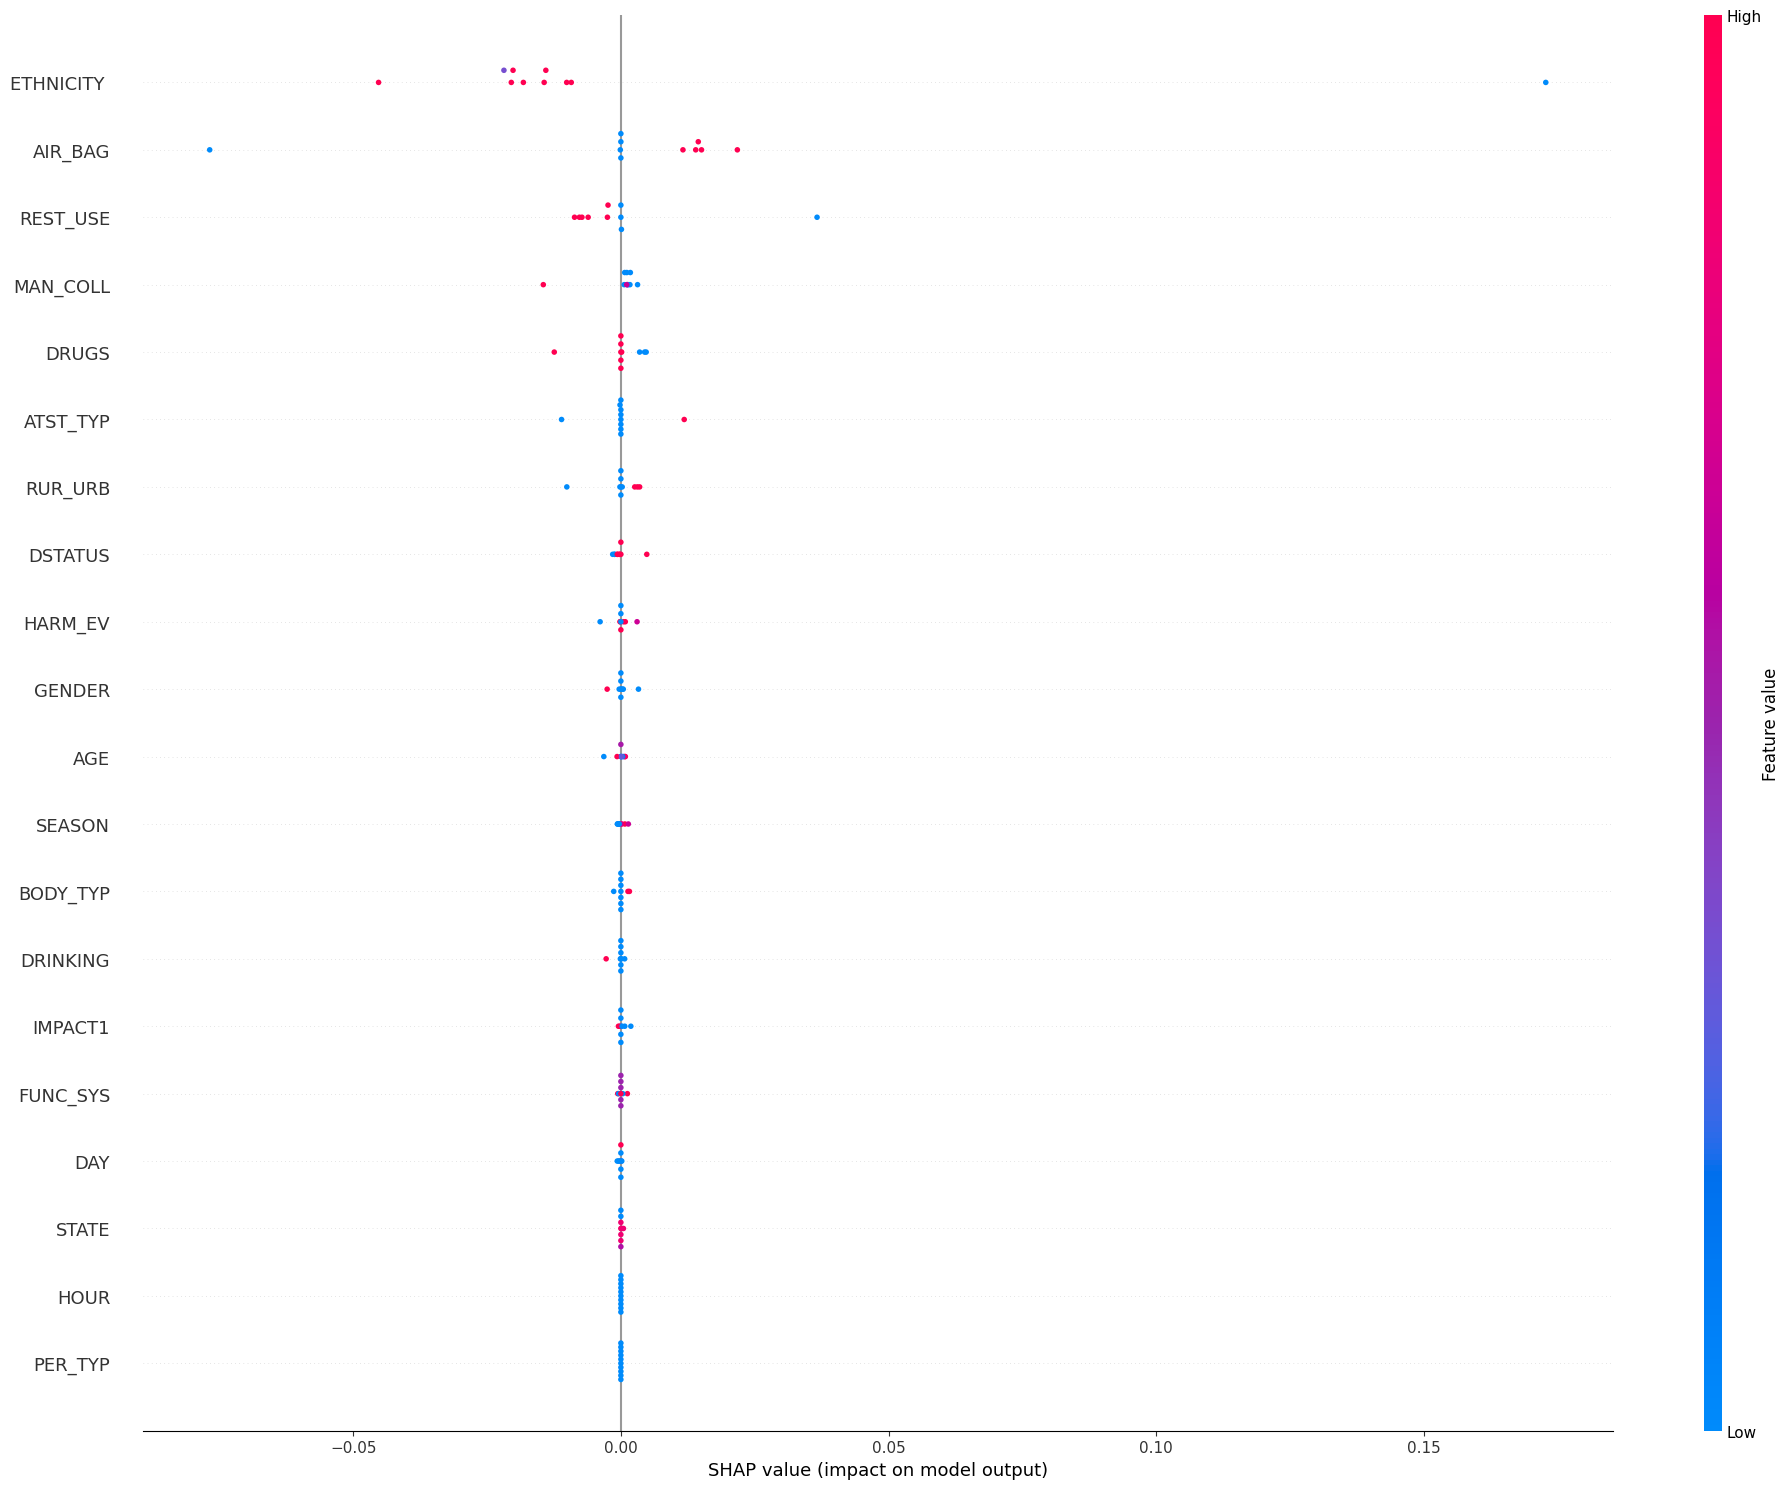

In [ ]:
shap.summary_plot(shap_values[:,:,0],X_test[:400],feature_names = features, plot_size=(20,15),show=False)

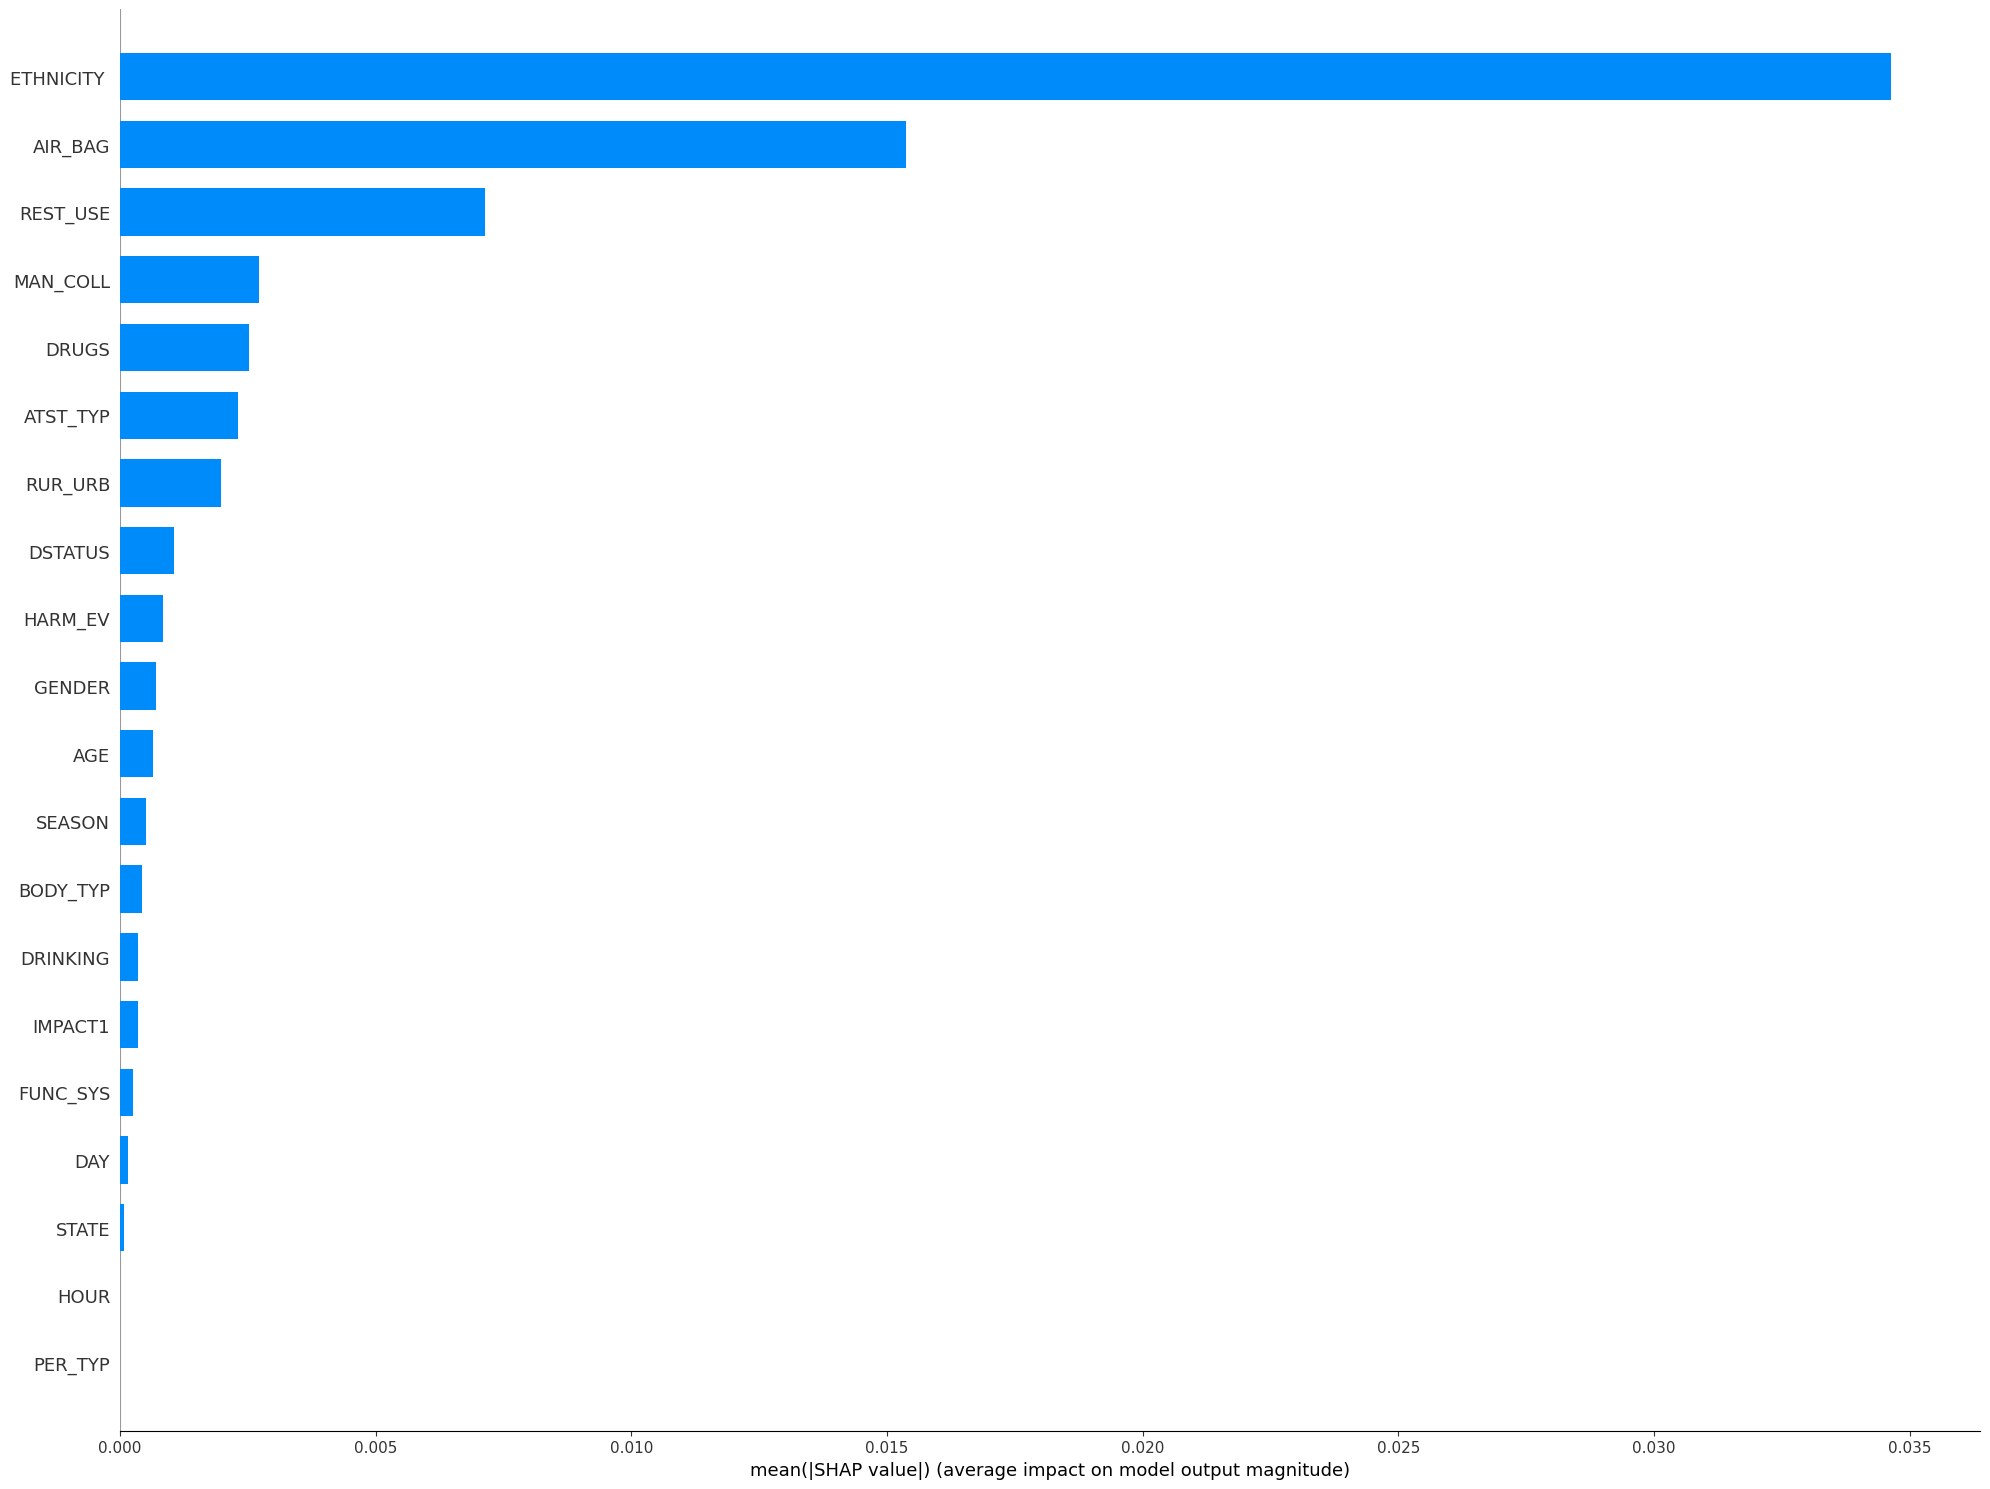

In [ ]:
shap.summary_plot(shap_values[:,:,0],X_test[:400],feature_names = features,plot_type="bar", plot_size=(20,15),show=False)